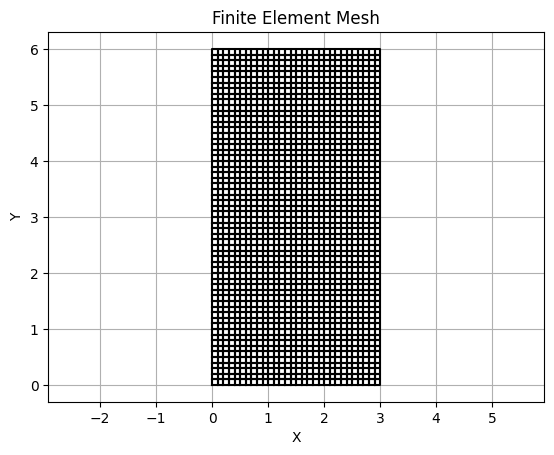

[[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 ...
 [3.  5.8]
 [3.  5.9]
 [3.  6. ]]
[[   0   61   62    1]
 [   1   62   63    2]
 [   2   63   64    3]
 ...
 [1826 1887 1888 1827]
 [1827 1888 1889 1828]
 [1828 1889 1890 1829]]


In [1]:
# THIS THE MAIN FE CODE #

import numpy as np
import math
from QuadrilateralMesh import QuadrilateralMesh  
from PlotMesh import PlotMesh
from solution import solution


tol = 1e-5 # tolerance for zero

## GEOMETRICAL PROPERTIES ##

Lx = 3
Ly = 6
h = 0.01 # Plate thickness

nx = 30 # number of division in x-direction
ny = 60 # number of division in y-direction

dx = Lx/nx # mesh size in x-direction
dy = Ly/ny # mesh size in y-direction


xy,elNode,nE,nP = QuadrilateralMesh(Lx,Ly,nx,ny) # discretizing the boundary

nDof = 2*nP # total number of degrees of freedom

PlotMesh(xy,elNode) # Plotting the mesh

print(xy)
print(elNode)








In [2]:
# ## MATERIAL PROPERTIES ##
E = 2e11  # elastic modulus
pois = 0.270 # Poisson's ratio
dens = 7850 # mass density


In [3]:
# BOUNDARY CONDITIONS #
left_boundary = np.where(xy[:, 0] == 0)     # left boundary
fixed_dofs = np.vstack([left_boundary[0], left_boundary[0]+nP]) # fixed degrees of freedom
print(fixed_dofs)
print(left_boundary)

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60]
 [1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
  1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
  1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
  1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946
  1947 1948 1949 1950 1951]]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),)


In [4]:
# FORCE VECTOR #
# generate a code that applies distributed force on right boundary and transform the distributed force into nodal force
fx = 50e8 # distributed force in x-direction
fy = 0 # distributed force in y-direction

force = np.zeros(2*nP) # initialize force vector

right_boundary = np.where(xy[:, 0] >= Lx-tol)     # right boundary


# convert distributed force into nodal force
force[right_boundary] = fx*dy
force[right_boundary[0][0]] = fx*dy/2
force[right_boundary[0][-1]] = fx*dy/2

print(force)



[0. 0. 0. ... 0. 0. 0.]


In [5]:
# CONSTITUTIVE MATRIX #
C = np.array([[1, pois, 0],
              [pois, 1, 0],
              [0, 0, (1-pois)/2]])
C *= E / (1 - pois**2)


In [6]:
# STIFFNESS MATRIX #
from StiffnessQuad import StiffnessMatrix 
xy = np.round(xy, 4)

stiff,mass, strainDispMat = StiffnessMatrix(nDof,nE,elNode,nP,xy,C,dens,h) # compute stiffness matrix

print(np.linalg.det(stiff))
print(np.linalg.det(mass))


-inf
0.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [7]:
disp = solution(nDof,fixed_dofs,stiff,force)
print(disp)



[ 0.          0.          0.         ... -2.02628492 -2.09381251
 -2.16129288]


In [8]:
print(xy)
print()
element = [1,6,7,2]
print(xy[element])

[[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 ...
 [3.  5.8]
 [3.  5.9]
 [3.  6. ]]

[[0.  0.1]
 [0.  0.6]
 [0.  0.7]
 [0.  0.2]]


In [9]:
print(disp[element])
element_v = [x + nE for x in element]
print(disp[element_v])

displacements = np.vstack([disp[element].reshape(-1,1), disp[element_v].reshape(-1,1)])
disp_reshape = displacements.reshape(-1,1)
print()
print(disp_reshape)
print()
print(displacements)

[0. 0. 0. 0.]
[6.88058057 6.9139048  6.92515783 6.88424851]

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [6.88058057]
 [6.9139048 ]
 [6.92515783]
 [6.88424851]]

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [6.88058057]
 [6.9139048 ]
 [6.92515783]
 [6.88424851]]


In [10]:
from solve_for_stress import solve_for_stress
stresses = solve_for_stress(disp, elNode,xy,C,strainDispMat)

uDisp= [0.         0.44307638 0.31131788 0.        ]
vDisp= [6.87838424 7.12958956 7.1317972  6.88058057]
element_displacements= [0.         0.44307638 0.31131788 0.         6.87838424 7.12958956
 7.1317972  6.88058057]
stress= [7.32942252e+11 2.02291849e+11 1.75882201e+11]
uDisp= [0.         0.31131788 0.27829538 0.        ]
vDisp= [6.88058057 7.1317972  7.13548355 6.88424851]
element_displacements= [0.         0.31131788 0.27829538 0.         6.88058057 7.1317972
 7.13548355 6.88424851]
stress= [6.17549889e+11 1.74082126e+11 1.92324945e+11]
uDisp= [0.         0.27829538 0.26046122 0.        ]
vDisp= [6.88424851 7.13548355 7.14065874 6.88939885]
element_displacements= [0.         0.27829538 0.26046122 0.         6.88424851 7.13548355
 7.14065874 6.88939885]
stress= [5.73017012e+11 1.65025778e+11 1.94870742e+11]
uDisp= [0.         0.26046122 0.25002398 0.        ]
vDisp= [6.88939885 7.14065874 7.1473364  6.89604614]
element_displacements= [0.         0.26046122 0.25002398 0.         6.

In [11]:
print(stresses)

[[ 7.32942252e+11  2.02291849e+11  1.75882201e+11]
 [ 6.17549889e+11  1.74082126e+11  1.92324945e+11]
 [ 5.73017012e+11  1.65025778e+11  1.94870742e+11]
 ...
 [ 4.98574321e+11 -5.52508028e+09  2.90999602e+10]
 [ 4.98472028e+11 -5.45453995e+09  2.75380790e+10]
 [ 4.98562307e+11 -5.38029415e+09  2.60355106e+10]]


In [12]:
print(stiff)
print()
print((strainDispMat))

[[ 9.81555388e+08  9.70769065e+07  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.70769065e+07  1.96311078e+09  9.70769065e+07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.70769065e+07  1.96311078e+09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.96311078e+09
  -5.87854600e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.87854600e+08
   1.96311078e+09 -5.87854600e+08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -5.87854600e+08  9.81555388e+08]]

[[-2.11324865  2.11324865  7.88675135 -7.88675135  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.         -7.88675135 -2.11324865
   2.11324865  7.88675135]
 [-7.88675135 -2.11324865  2.11324865  7.88675135 -2.11324865  2.11324865
   7.88675135 -7.88675135]]


In [13]:
print(disp)

[ 0.          0.          0.         ... -2.02628492 -2.09381251
 -2.16129288]


In [14]:
print(np.shape(disp))

(3782,)


In [15]:
udof = np.arange(0, nP, 1)
vdof = udof + nP

ux = disp[udof]
uy = disp[vdof]

In [16]:
print(elNode)

[[   0   61   62    1]
 [   1   62   63    2]
 [   2   63   64    3]
 ...
 [1826 1887 1888 1827]
 [1827 1888 1889 1828]
 [1828 1889 1890 1829]]


[ 0 61 62  1]
[ 1 62 63  2]
[ 2 63 64  3]
[ 3 64 65  4]
[ 4 65 66  5]
[ 5 66 67  6]
[ 6 67 68  7]
[ 7 68 69  8]
[ 8 69 70  9]
[ 9 70 71 10]
[10 71 72 11]
[11 72 73 12]
[12 73 74 13]
[13 74 75 14]
[14 75 76 15]
[15 76 77 16]
[16 77 78 17]
[17 78 79 18]
[18 79 80 19]
[19 80 81 20]
[20 81 82 21]
[21 82 83 22]
[22 83 84 23]
[23 84 85 24]
[24 85 86 25]
[25 86 87 26]
[26 87 88 27]
[27 88 89 28]
[28 89 90 29]
[29 90 91 30]
[30 91 92 31]
[31 92 93 32]
[32 93 94 33]
[33 94 95 34]
[34 95 96 35]
[35 96 97 36]
[36 97 98 37]
[37 98 99 38]
[ 38  99 100  39]
[ 39 100 101  40]
[ 40 101 102  41]
[ 41 102 103  42]
[ 42 103 104  43]
[ 43 104 105  44]
[ 44 105 106  45]
[ 45 106 107  46]
[ 46 107 108  47]
[ 47 108 109  48]
[ 48 109 110  49]
[ 49 110 111  50]
[ 50 111 112  51]
[ 51 112 113  52]
[ 52 113 114  53]
[ 53 114 115  54]
[ 54 115 116  55]
[ 55 116 117  56]
[ 56 117 118  57]
[ 57 118 119  58]
[ 58 119 120  59]
[ 59 120 121  60]
[ 61 122 123  62]
[ 62 123 124  63]
[ 63 124 125  64]
[ 64 125 126  65]


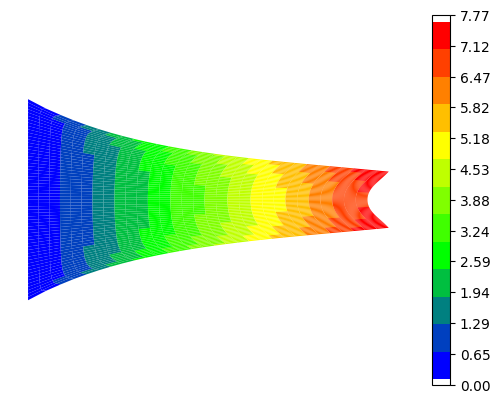

In [17]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# Assuming xy, ux, uy, and elNode are already defined
scale = 1
xy_NewFEM = xy + scale * np.column_stack((ux, uy))
min_u_FEM = np.min(ux)
max_u_FEM = np.max(ux)
# Assuming the first column is unnecessary
elNode_corrected = elNode[:, 1:]

from PlotFieldonMesh import PlotFieldonMesh
PlotFieldonMesh(xy_NewFEM,elNode,ux,min_u_FEM,max_u_FEM)

[ 0 61 62  1]
[ 1 62 63  2]
[ 2 63 64  3]
[ 3 64 65  4]
[ 4 65 66  5]
[ 5 66 67  6]
[ 6 67 68  7]
[ 7 68 69  8]
[ 8 69 70  9]
[ 9 70 71 10]
[10 71 72 11]
[11 72 73 12]
[12 73 74 13]
[13 74 75 14]
[14 75 76 15]
[15 76 77 16]
[16 77 78 17]
[17 78 79 18]
[18 79 80 19]
[19 80 81 20]
[20 81 82 21]
[21 82 83 22]
[22 83 84 23]
[23 84 85 24]
[24 85 86 25]
[25 86 87 26]
[26 87 88 27]
[27 88 89 28]
[28 89 90 29]
[29 90 91 30]
[30 91 92 31]
[31 92 93 32]
[32 93 94 33]
[33 94 95 34]
[34 95 96 35]
[35 96 97 36]
[36 97 98 37]
[37 98 99 38]
[ 38  99 100  39]
[ 39 100 101  40]
[ 40 101 102  41]
[ 41 102 103  42]
[ 42 103 104  43]
[ 43 104 105  44]
[ 44 105 106  45]
[ 45 106 107  46]
[ 46 107 108  47]
[ 47 108 109  48]
[ 48 109 110  49]
[ 49 110 111  50]
[ 50 111 112  51]
[ 51 112 113  52]
[ 52 113 114  53]
[ 53 114 115  54]
[ 54 115 116  55]
[ 55 116 117  56]
[ 56 117 118  57]
[ 57 118 119  58]
[ 58 119 120  59]
[ 59 120 121  60]
[ 61 122 123  62]
[ 62 123 124  63]
[ 63 124 125  64]
[ 64 125 126  65]


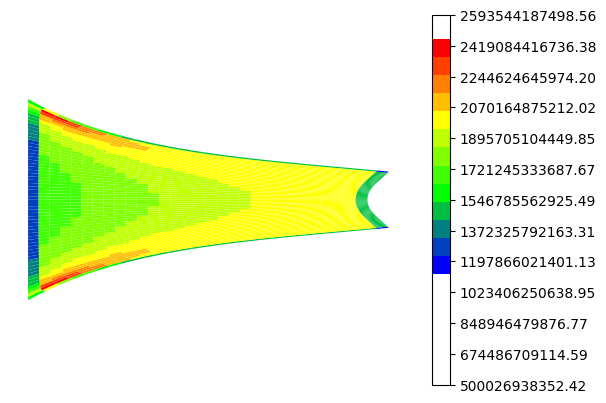

[ 0 61 62  1]
[ 1 62 63  2]
[ 2 63 64  3]
[ 3 64 65  4]
[ 4 65 66  5]
[ 5 66 67  6]
[ 6 67 68  7]
[ 7 68 69  8]
[ 8 69 70  9]
[ 9 70 71 10]
[10 71 72 11]
[11 72 73 12]
[12 73 74 13]
[13 74 75 14]
[14 75 76 15]
[15 76 77 16]
[16 77 78 17]
[17 78 79 18]
[18 79 80 19]
[19 80 81 20]
[20 81 82 21]
[21 82 83 22]
[22 83 84 23]
[23 84 85 24]
[24 85 86 25]
[25 86 87 26]
[26 87 88 27]
[27 88 89 28]
[28 89 90 29]
[29 90 91 30]
[30 91 92 31]
[31 92 93 32]
[32 93 94 33]
[33 94 95 34]
[34 95 96 35]
[35 96 97 36]
[36 97 98 37]
[37 98 99 38]
[ 38  99 100  39]
[ 39 100 101  40]
[ 40 101 102  41]
[ 41 102 103  42]
[ 42 103 104  43]
[ 43 104 105  44]
[ 44 105 106  45]
[ 45 106 107  46]
[ 46 107 108  47]
[ 47 108 109  48]
[ 48 109 110  49]
[ 49 110 111  50]
[ 50 111 112  51]
[ 51 112 113  52]
[ 52 113 114  53]
[ 53 114 115  54]
[ 54 115 116  55]
[ 55 116 117  56]
[ 56 117 118  57]
[ 57 118 119  58]
[ 58 119 120  59]
[ 59 120 121  60]
[ 61 122 123  62]
[ 62 123 124  63]
[ 63 124 125  64]
[ 64 125 126  65]


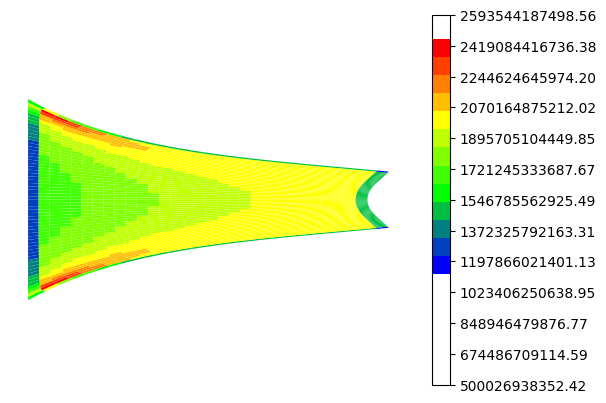

In [18]:
from CalculateStress import CalculateStress
Sxx_node_FEM, Syy_node_FEM, Sxy_node_FEM = CalculateStress(nE,nP,elNode,disp,xy,C)

von_misses_stresses = np.sqrt(Sxx_node_FEM**2 - Sxx_node_FEM * Syy_node_FEM + Syy_node_FEM**2 + 3 * Sxy_node_FEM**2)


min_von_misses = np.min(von_misses_stresses)
max_von_misses = np.max(von_misses_stresses)

PlotFieldonMesh(xy_NewFEM,elNode,von_misses_stresses.flatten(),min_von_misses,max_von_misses)

PlotFieldonMesh(xy_NewFEM,elNode,np.ravel(von_misses_stresses),min_von_misses,max_von_misses)


